In [9]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from turtle import color
from sklearn.linear_model import LinearRegression


**Entire home**

In [10]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('Roma Hotel room.csv')
df.head()

id                            name  \
0  181189      ^_^ LoVeLy DoUbLe RoOm ^_^   
1  272634  Sixtythree bb - double ensuite   
2  329646            Standard Double Room   
3  329669            Superior Double Room   
4  428414             Momo Central Rome 3   

                                         description  \
0                                         Indefinido   
1  Since 2005 Sixtythree Guesthouse has been offe...   
2  Moai Home is well connected;<br />- With the c...   
3  Moai Home is well connected;<br />- With the c...   
4  Apartment very spacious, cozy and tastefully r...   

                               neighborhood_overview  host_id  \
0                                         Indefinido   868477   
1                                         Indefinido  1426840   
2                                         Indefinido  1429012   
3                                         Indefinido  1429012   
4  The Aurelio residential district is very quiet...  1238041   

            host_name  host_since host_location host_response_time  \
0               Luigi  25/07/2011   Rome, Italy     within an hour   
1             Gaetano  20/11/2011   Rome, Italy     within an hour   
2  Emanuele & Natalya  21/11/2011   Rome, Italy     within an hour   
3  Emanuele & Natalya  21/11/2011   Rome, Italy     within an hour   
4                Momo  02/10/2011   Rome, Italy     within an hour   

  host_response_rate  ... neighbourhood_cleansed.1        property_type.1  \
0               100%  ...          XII Monte Verde     Entire rental unit   
1               100%  ...         I Centro Storico     Entire rental unit   
2                88%  ...         I Centro Storico  Private room in condo   
3                88%  ...         I Centro Storico           Entire condo   
4               100%  ...        VIII Appia Antica  Private room in condo   

       room_type.1  bathrooms_text.1  \
0  Entire home/apt            1 bath   
1  Entire home/apt            1 bath   
2     Private room    1 private bath   
3  Entire home/apt           2 baths   
4     Private room     1 shared bath   

                                         amenities.1 has_availability  \
0  ["Crib", "Dedicated workspace", "Courtyard vie...                t   
1  ["Dedicated workspace", "Courtyard view", "Sha...                t   
2  ["Cleaning products", "Dedicated workspace", "...                t   
3  ["Crib", "Wine glasses", "Dining table", "Dedi...                t   
4  ["Cleaning available during stay", "Crib", "Fa...                t   

  instant_bookable  host_total_listings_count  review_scores_accuracy  \
0                t                          1                    4.74   
1                f                          3                    4.91   
2                f                          4                    4.90   
3                f                          2                    4.90   
4                f                          3                    4.77   

  host_is_superhost  
0                 f  
1                 f  
2                 t  
3                 f  
4                 f  

[5 rows x 66 columns]

**price vs host_acceptance rate**

In [11]:
df['price'] = df['price'].fillna('0').astype(str)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

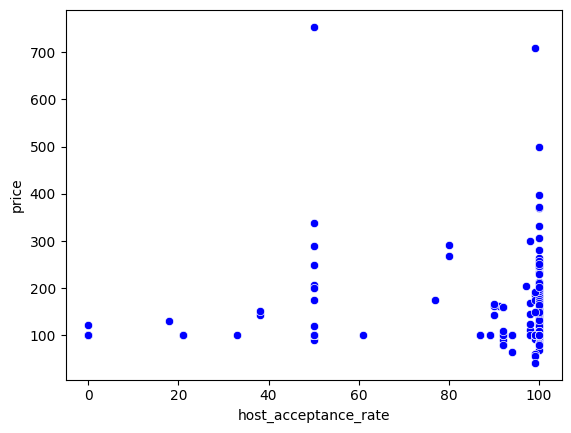

In [12]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [13]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model = LinearRegression()
model.fit(X=Vars_Indep, y=Vars_Dep)
model.score(Vars_Indep,Vars_Dep)

0.013024390358592708

In [14]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_acceptance_rate', y_pred)
df.head()

Predicciones_host_acceptance_rate      id                            name  \
0                         150.244860  181189      ^_^ LoVeLy DoUbLe RoOm ^_^   
1                         151.007438  272634  Sixtythree bb - double ensuite   
2                         151.007438  329646            Standard Double Room   
3                         151.007438  329669            Superior Double Room   
4                         151.007438  428414             Momo Central Rome 3   

                                         description  \
0                                         Indefinido   
1  Since 2005 Sixtythree Guesthouse has been offe...   
2  Moai Home is well connected;<br />- With the c...   
3  Moai Home is well connected;<br />- With the c...   
4  Apartment very spacious, cozy and tastefully r...   

                               neighborhood_overview  host_id  \
0                                         Indefinido   868477   
1                                         Indefinido  1426840   
2                                         Indefinido  1429012   
3                                         Indefinido  1429012   
4  The Aurelio residential district is very quiet...  1238041   

            host_name  host_since host_location host_response_time  ...  \
0               Luigi  25/07/2011   Rome, Italy     within an hour  ...   
1             Gaetano  20/11/2011   Rome, Italy     within an hour  ...   
2  Emanuele & Natalya  21/11/2011   Rome, Italy     within an hour  ...   
3  Emanuele & Natalya  21/11/2011   Rome, Italy     within an hour  ...   
4                Momo  02/10/2011   Rome, Italy     within an hour  ...   

  neighbourhood_cleansed.1        property_type.1      room_type.1  \
0          XII Monte Verde     Entire rental unit  Entire home/apt   
1         I Centro Storico     Entire rental unit  Entire home/apt   
2         I Centro Storico  Private room in condo     Private room   
3         I Centro Storico           Entire condo  Entire home/apt   
4        VIII Appia Antica  Private room in condo     Private room   

  bathrooms_text.1                                        amenities.1  \
0           1 bath  ["Crib", "Dedicated workspace", "Courtyard vie...   
1           1 bath  ["Dedicated workspace", "Courtyard view", "Sha...   
2   1 private bath  ["Cleaning products", "Dedicated workspace", "...   
3          2 baths  ["Crib", "Wine glasses", "Dining table", "Dedi...   
4    1 shared bath  ["Cleaning available during stay", "Crib", "Fa...   

   has_availability instant_bookable host_total_listings_count  \
0                 t                t                         1   
1                 t                f                         3   
2                 t                f                         4   
3                 t                f                         2   
4                 t                f                         3   

   review_scores_accuracy  host_is_superhost  
0                    4.74                  f  
1                    4.91                  f  
2                    4.90                  t  
3                    4.90                  f  
4                    4.77                  f  

[5 rows x 67 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

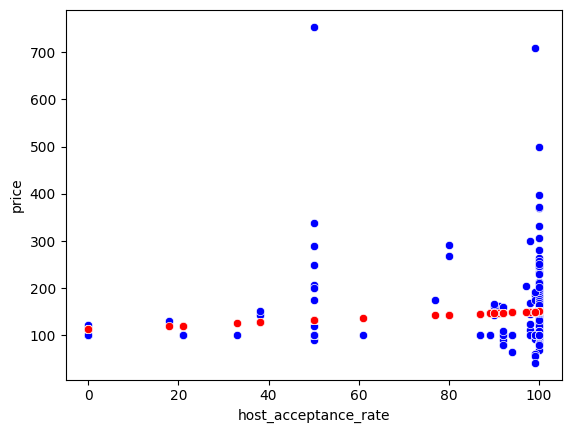

In [15]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones_host_acceptance_rate', color="red", data=df)

In [16]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.013024390358592708
Correlación: 0.11412445118638122


**price vs host_is_superhost**

C:\Users\diego\AppData\Local\Temp\ipykernel_12880\1597296358.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')


<Axes: xlabel='host_is_superhost', ylabel='price'>

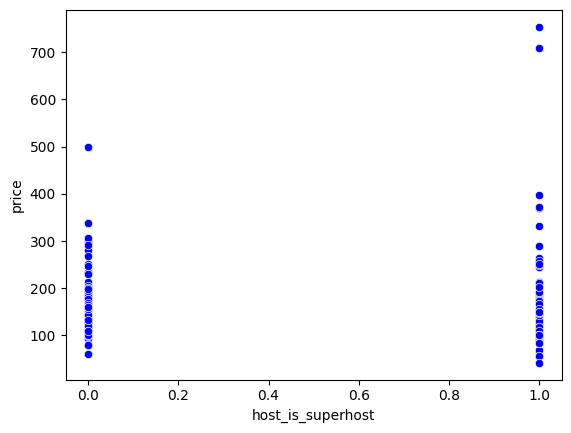

In [17]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [18]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model2 = LinearRegression()
model2.fit(X=Vars_Indep, y=Vars_Dep)
model2.score(Vars_Indep,Vars_Dep)

0.0016616651976715247

In [19]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model2.predict(X=df[['host_is_superhost']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_is_superhost', y_pred)
df.head()

Predicciones_host_is_superhost  Predicciones_host_acceptance_rate      id  \
0                      141.038462                         150.244860  181189   
1                      141.038462                         151.007438  272634   
2                      148.219048                         151.007438  329646   
3                      141.038462                         151.007438  329669   
4                      141.038462                         151.007438  428414   

                             name  \
0      ^_^ LoVeLy DoUbLe RoOm ^_^   
1  Sixtythree bb - double ensuite   
2            Standard Double Room   
3            Superior Double Room   
4             Momo Central Rome 3   

                                         description  \
0                                         Indefinido   
1  Since 2005 Sixtythree Guesthouse has been offe...   
2  Moai Home is well connected;<br />- With the c...   
3  Moai Home is well connected;<br />- With the c...   
4  Apartment very spacious, cozy and tastefully r...   

                               neighborhood_overview  host_id  \
0                                         Indefinido   868477   
1                                         Indefinido  1426840   
2                                         Indefinido  1429012   
3                                         Indefinido  1429012   
4  The Aurelio residential district is very quiet...  1238041   

            host_name  host_since host_location  ... neighbourhood_cleansed.1  \
0               Luigi  25/07/2011   Rome, Italy  ...          XII Monte Verde   
1             Gaetano  20/11/2011   Rome, Italy  ...         I Centro Storico   
2  Emanuele & Natalya  21/11/2011   Rome, Italy  ...         I Centro Storico   
3  Emanuele & Natalya  21/11/2011   Rome, Italy  ...         I Centro Storico   
4                Momo  02/10/2011   Rome, Italy  ...        VIII Appia Antica   

         property_type.1      room_type.1 bathrooms_text.1  \
0     Entire rental unit  Entire home/apt           1 bath   
1     Entire rental unit  Entire home/apt           1 bath   
2  Private room in condo     Private room   1 private bath   
3           Entire condo  Entire home/apt          2 baths   
4  Private room in condo     Private room    1 shared bath   

                                         amenities.1  has_availability  \
0  ["Crib", "Dedicated workspace", "Courtyard vie...                 t   
1  ["Dedicated workspace", "Courtyard view", "Sha...                 t   
2  ["Cleaning products", "Dedicated workspace", "...                 t   
3  ["Crib", "Wine glasses", "Dining table", "Dedi...                 t   
4  ["Cleaning available during stay", "Crib", "Fa...                 t   

   instant_bookable host_total_listings_count review_scores_accuracy  \
0                 t                         1                   4.74   
1                 f                         3                   4.91   
2                 f                         4                   4.90   
3                 f                         2                   4.90   
4                 f                         3                   4.77   

   host_is_superhost  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

[5 rows x 68 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

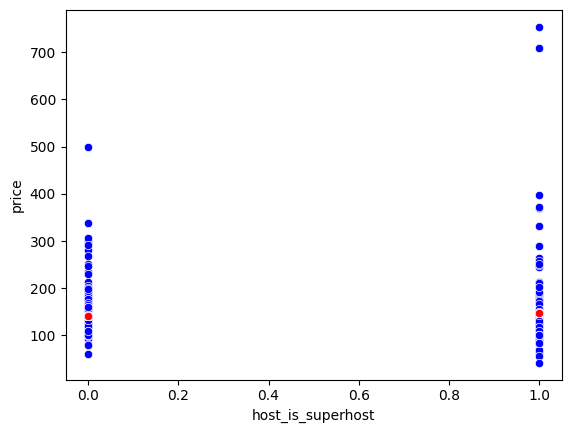

In [20]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones_host_is_superhost', color="red", data=df)

In [21]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model2.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.0016616651976715247
Correlación: 0.04076352778736802


**accommodates vs bathrooms**


<Axes: xlabel='bathrooms', ylabel='accommodates'>

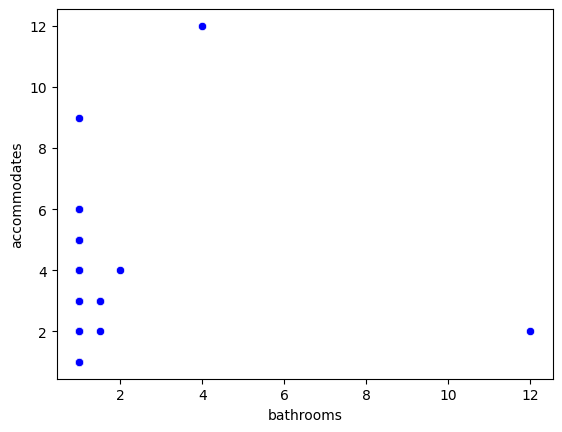

In [22]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [23]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['accommodates']
model3 = LinearRegression()
model3.fit(X=Vars_Indep, y=Vars_Dep)
model3.score(Vars_Indep,Vars_Dep)

0.015087544125897079

In [24]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model3.predict(X=df[['bathrooms']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_bathrooms', y_pred)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

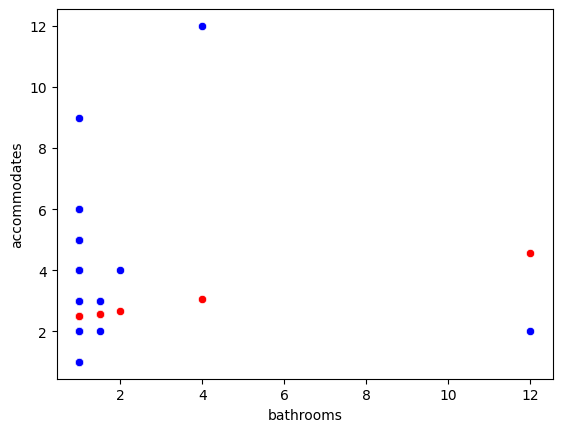

In [25]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones_bathrooms', color="red", data=df)

In [26]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model3.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.015087544125897079
Correlación: 0.12283136458534147


**price vs review_scores_cleanliness**


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

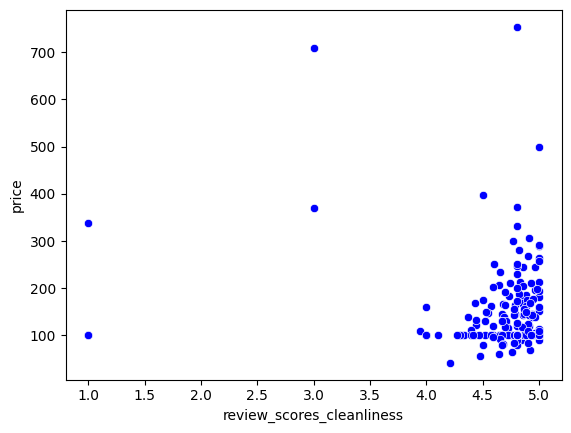

In [27]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [28]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model4 = LinearRegression()
model4.fit(X=Vars_Indep, y=Vars_Dep)
model4.score(Vars_Indep,Vars_Dep)

0.0234811958518365

In [29]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model4.predict(X=df[['review_scores_cleanliness']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_review_scores_cleanliness', y_pred)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

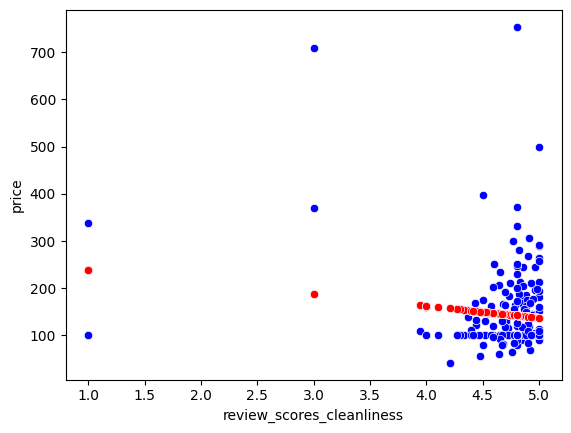

In [30]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_review_scores_cleanliness', color="red", data=df)

In [31]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model4.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.0234811958518365
Correlación: 0.15323575252478286


**price vs host_identity_verified**


C:\Users\diego\AppData\Local\Temp\ipykernel_12880\1167548800.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')


<Axes: xlabel='host_identity_verified', ylabel='price'>

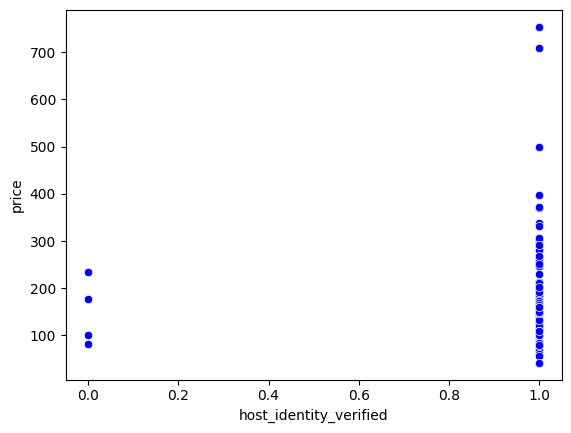

In [32]:
df['host_identity_verified'] = df['host_identity_verified'].fillna(method='ffill')
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_identity_verified'] = df['host_identity_verified'].astype(int)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)

In [33]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model5 = LinearRegression()
model5.fit(X=Vars_Indep, y=Vars_Dep)
model5.score(Vars_Indep,Vars_Dep)

3.267273654261604e-05

In [34]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model5.predict(X=df[['host_identity_verified']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_host_identity_verifieds', y_pred)

<Axes: xlabel='host_identity_verified', ylabel='price'>

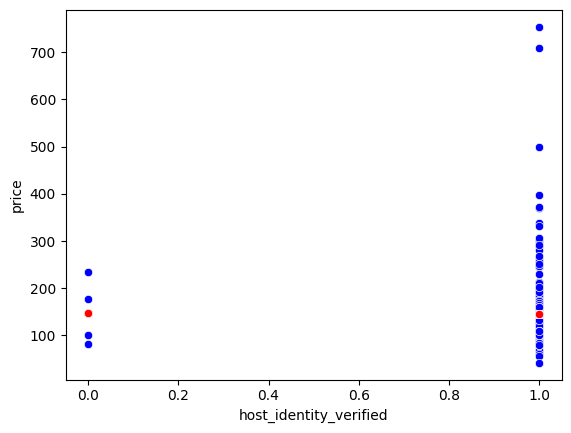

In [35]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df)
sns.scatterplot(x='host_identity_verified', y='Predicciones_host_identity_verifieds', color="red", data=df)

In [36]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model5.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 3.267273654261604e-05
Correlación: 0.005716007045360952


**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

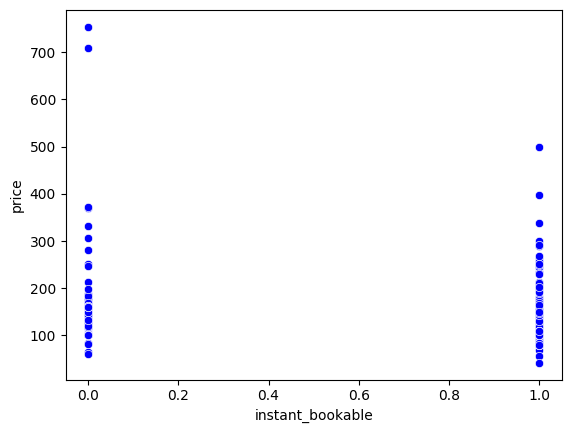

In [37]:
df['instant_bookable']
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].astype(int)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [38]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model6 = LinearRegression()
model6.fit(X=Vars_Indep, y=Vars_Dep)
model6.score(Vars_Indep,Vars_Dep)

0.0065878604782309

In [39]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model6.predict(X=df[['instant_bookable']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_instant_bookable', y_pred)

<Axes: xlabel='instant_bookable', ylabel='price'>

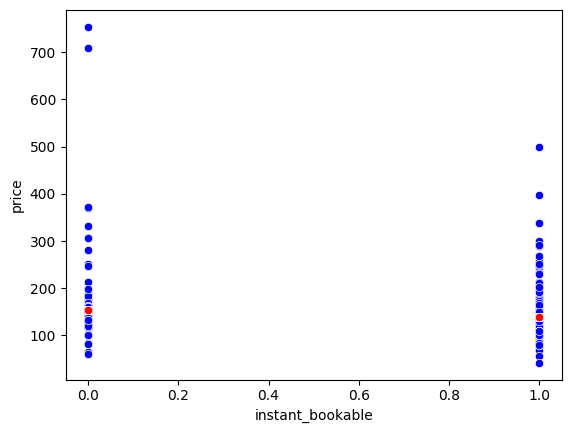

In [40]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones_instant_bookable', color="red", data=df)

In [41]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model6.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.0065878604782309
Correlación: 0.0811656360674325


**Price vs property_type**


<Axes: xlabel='property_type', ylabel='price'>

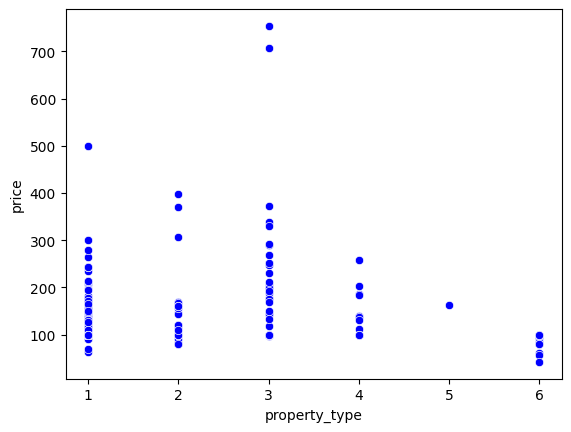

In [42]:
unique_values = df['property_type'].unique()
mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}
df['property_type'] = df['property_type'].map(mapping_dict)
sns.scatterplot(x='property_type', y='price', color="blue", data=df)

In [43]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['property_type']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']
model7 = LinearRegression()
model7.fit(X=Vars_Indep, y=Vars_Dep)
model7.score(Vars_Indep,Vars_Dep)

0.005843547274361982

In [44]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model7.predict(X=df[['property_type']])
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones_property_type', y_pred)

<Axes: xlabel='property_type', ylabel='price'>

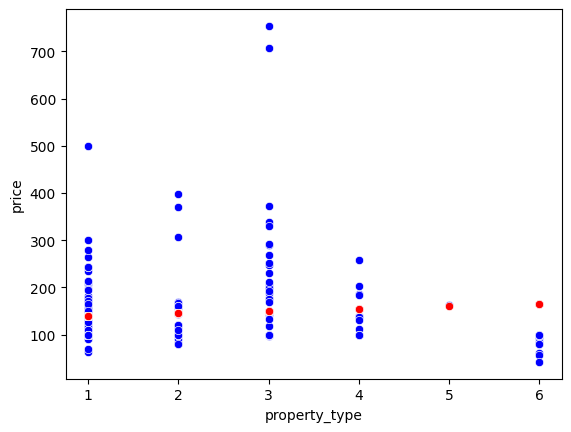

In [45]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color="blue", data=df)
sns.scatterplot(x='property_type', y='Predicciones_property_type', color="red", data=df)

In [46]:
#Corroboramos cual es el coeficiente de Determinación y Coorelacion de nuestro modelo
coef_Deter = model7.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)
print(f"Determinación: {coef_Deter}")
print(f"Correlación: {coef_Correl}")

Determinación: 0.005843547274361982
Correlación: 0.076443098278144
